# ПРАКТИКА. ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

HR-агентство изучает тренды на рынке труда в IT. 
Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

## ОПИСАНИЕ СТОЛБЦОВ 
- work_year	Год, в котором была выплачена зарплата.
- experience_level	Опыт работы на этой должности в течение года со следующими возможными значениями:
    - EN — Entry-level/Junior;
    - MI — Mid-level/Intermediate;
    - SE — Senior-level/Expert;
    - EX — Executive-level/Director.
- employment_type	Тип трудоустройства для этой роли:
    - PT — неполный рабочий день;
    - FT — полный рабочий день;
    - CT — контракт;
    - FL — фриланс.
- job_title	Роль, в которой соискатель работал в течение года.
- salary	Общая выплаченная валовая сумма заработной платы.
- salary_currency	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- salary_in_usd	Зарплата в долларах США 
(валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- employee_residence	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
- remote_ratio	Общий объём работы, выполняемой удалённо. Возможные значения:
    - 0 — удалённой работы нет (менее 20 %);
    - 50 — частично удалённая работа;
    - 100 — полностью удалённая работа (более 80 %).
- company_location	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
- company_size	Среднее количество людей, работавших в компании в течение года:
    - S — менее 50 сотрудников (небольшая компания);
    - M — от 50 до 250 сотрудников (средняя компания);
    - L — более 250 сотрудников (крупная компания).

Оригинальный датасет: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

Исследуйте данные и сделайте выводы по полученным результатам. 
Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:
1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
    - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:
- тесты для количественного признака:
    - для одной выборки;
    - для двух выборок;
    - для нескольких выборок;
- тест для категориальных признаков.

In [2742]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [2743]:
# загружаем данные и посмотрим на них
data = pd.read_csv('data/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [2744]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


---

## Описательный анализ данных

In [2745]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений).


Удалим дубликаты

In [2746]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


Дубликатов нет

---

## Статистика

In [2747]:
display(data.describe(include=['object']))
data.describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Исходя из поставленных вопросов для анализа будем использовать количественный признак salary_in_usd  и категориальные job_title, company_size. 
Признак work_year числовой, но принимает всего 3 значения. В зависимости от задачи его можно использовать и как категориальный и как количественный.

Пока не буду удалять лишние данные.

In [2748]:
data['job_title'].value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

Большинство данных относятся к четырем ролям: Data Scientist, Data Engineer, Data Analyst и Machine Learning Engineer.
Количество данных по остальным специальностям не позводяет делать значимые выводы.
Далее отбросим все специальности кроме анализируемых с помощью маски.

Примечание: Хочется добавить Machine Learning Engineer к специальности Data Scientist.

In [2749]:
mask = (data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')  

---

## Визуальный анализ

Посмотрим на распределение зарплаты в выборке

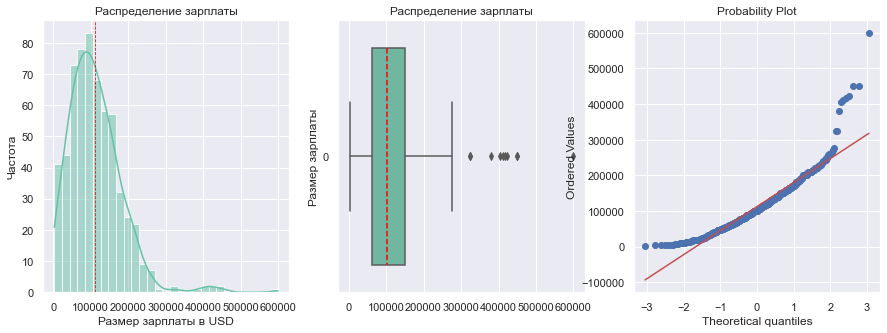

In [2750]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в USD', ylabel='Частота')
axes[0].set_title('Распределение зарплаты')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение зарплаты')

stats.probplot(data['salary_in_usd'], dist='norm', plot=sns.mpl.pyplot)

plt.show()

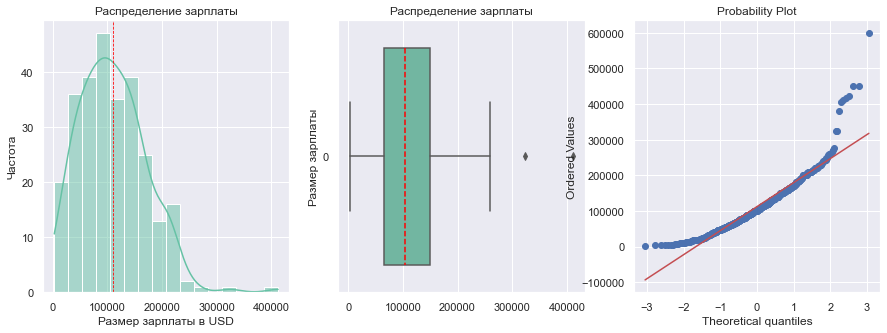

In [2751]:
# повторим с фильтром с фильтром по специальностям
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data[mask]['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в USD', ylabel='Частота')
axes[0].set_title('Распределение зарплаты')
axes[0].axvline(data[mask]['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data[mask]['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение зарплаты')

stats.probplot(data['salary_in_usd'], dist='norm', plot=sns.mpl.pyplot)

plt.show()

In [2752]:
# Удалим лишние специальности
data = data[mask]

In [2753]:
# удалим выбросы.
data = data[(data['salary_in_usd']<300000)]


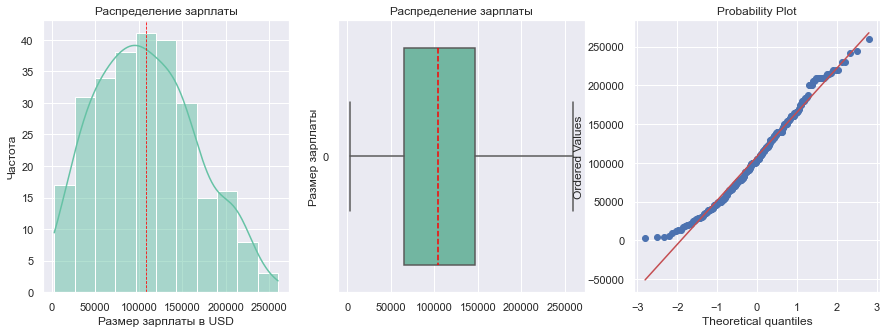

In [2754]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в USD', ylabel='Частота')
axes[0].set_title('Распределение зарплаты')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение зарплаты')

stats.probplot(data['salary_in_usd'], dist='norm', plot=sns.mpl.pyplot)
plt.show()

__Выводы:__ 
1. Распределение зарплаты возможно отлично от нормального, имеются выбросы.
2. Оставив анализируемые специальности и удалив выбросы, мы приблизили его к нормальному.

---

1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

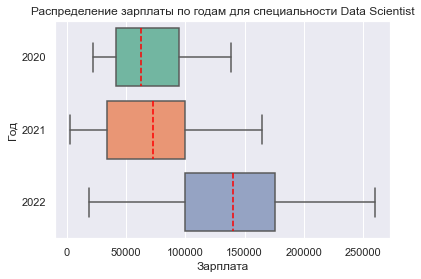

In [2755]:
ax = sns.boxplot(data[(data['job_title']=='Data Scientist') ], x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата', ylabel='Год')
plt.title('Распределение зарплаты по годам для специальности Data Scientist')
plt.show()


In [2756]:
data_agg = data[data['job_title']=='Data Scientist'].groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от года для специальности Data Scientist')
data_agg

Зарплата в зависимости от года для специальности Data Scientist


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,20.0,69669.05,33268.11,21669.0,41768.0,62726.0,94677.75,138350.0
2021,45.0,70671.73,45422.97,2859.0,33808.0,73000.0,100000.00,165000.0
2022,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.00,260000.0


__Вывод:__ В 2022 году рост очевиден.

---

2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году

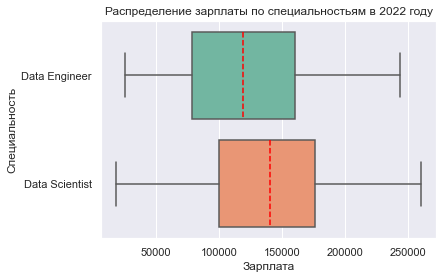

In [2757]:
ax = sns.boxplot(data[data['work_year']==2022], x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата', ylabel='Специальность')
plt.title('Распределение зарплаты по специальностьям в 2022 году')
plt.show()

In [2758]:
data_agg = data[data['work_year']==2022].groupby('job_title')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от специальности в 2022 году')
data_agg

Зарплата в зависимости от специальности в 2022 году


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,88.0,124129.97,52085.20,25000.0,78526.0,118894.5,160000.0,243900.0
Data Scientist,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


__Вывод:__ Для специальности Data Scientist средние значения выше, что позволяет сделать сделать вывод о том, что зарплата по этой специальности выше.

---

3. Как соотносятся зарплата специалистов Data Scientist в компаниях различных размеров?

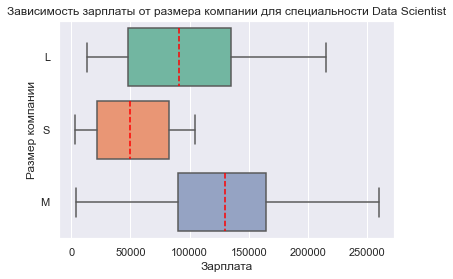

In [2759]:
ax = sns.boxplot(data[data['job_title']=='Data Scientist'], x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата', ylabel='Размер компании')
plt.title('Зависимость зарплаты от размера компании для специальности Data Scientist')
plt.show()

In [2760]:
data_agg = data[data['job_title']=='Data Scientist'].groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от размера компании в 2022 году')
data_agg

Зарплата в зависимости от размера компании в 2022 году


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,44.0,96297.75,54872.66,13400.0,47620.25,90734.0,135000.0,215300.0
M,77.0,126380.75,56389.53,4000.0,90000.00,130000.0,165000.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.00,49268.0,82500.0,105000.0


__Вывод:__ специалистам Data Scientist максимальную зарплату предлагают в средних компаниях (от 50 до 250 сотрудников), а в небольших компаниях (менее 50 сотрудников) минимальную.

---

4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

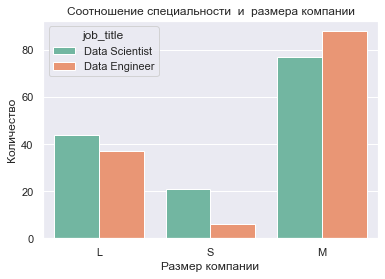

In [2761]:
ax = sns.countplot(data=data, hue=data['job_title'], x='company_size')
ax.set(xlabel='Размер компании', ylabel='Количество')
plt.title('Соотношение специальности  и  размера компании')
plt.show()

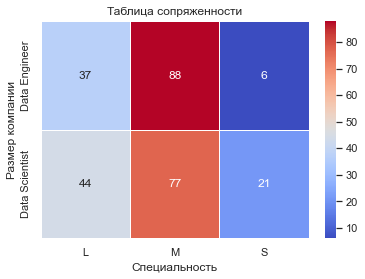

In [2762]:
cross_tab = pd.crosstab(index=data['job_title'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Специальность', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()

__Вывод:__  Связь видна. Вакансий на Data Engineer в средних компаниях больше чем на Data Scientist. В небольших и крупных компаниях ситуация обратная.

---

Посмотрим на тип занятости.
Стоит ожидать, он существенно влияет на уровень зарплаты.

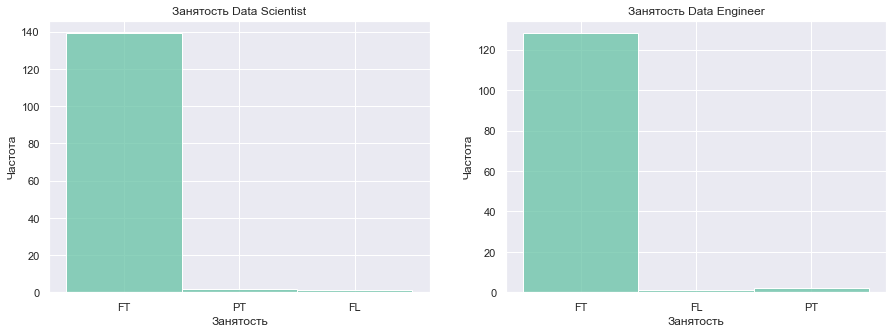

In [2763]:
# Сравнимо ли количество данных с разным уровнем занятости?
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data[data['job_title']=='Data Scientist']['employment_type'], ax=axes[0])
axes[0].set(xlabel='Занятость', ylabel='Частота')
axes[0].set_title('Занятость Data Scientist')

sns.histplot(data[data['job_title']=='Data Engineer']['employment_type'], ax=axes[1])
axes[1].set(xlabel='Занятость', ylabel='Частота')
axes[1].set_title('Занятость Data Engineer')

plt.show()

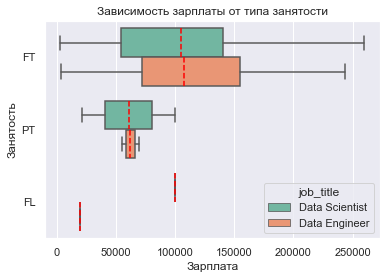

In [2764]:
# Как влияет тип занятости на зарплату?

ax = sns.boxplot(data, 
                 x='salary_in_usd', 
                 y='employment_type', 
                 orient='h', 
                 medianprops={"color": "red", "linestyle": '--'},
                 hue='job_title')
ax.set(xlabel='Зарплата', ylabel='Занятость')
plt.title('Зависимость зарплаты от типа занятости')
plt.show()

Визуальный анализ подтвердает, что зарплата в существенной степени зависит от типа трудоустройства, но выборке в основном представлены данные по полной занятости, этому далее анализ будем выполнять, убрав неполную занятость и фриланс.


In [2765]:
data = data[data['employment_type']=='FT']

---

Посмотрим на опыт работы.
Стоит ожидать, он существенно влияет на уровень зарплаты.

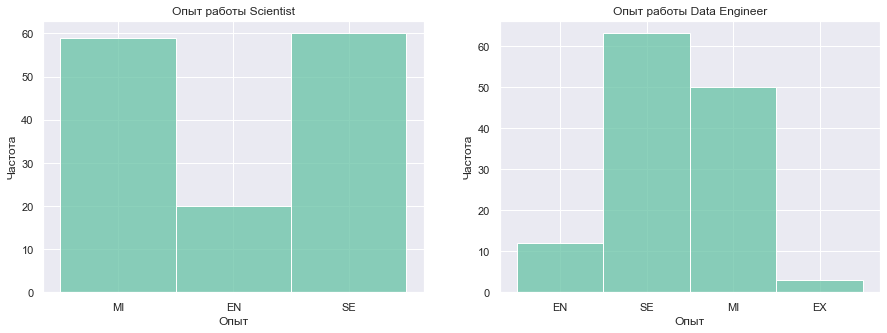

In [2766]:
# Сравнимо ли количество данных с разным опытом?
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data[data['job_title']=='Data Scientist']['experience_level'], ax=axes[0])
axes[0].set(xlabel='Опыт', ylabel='Частота')
axes[0].set_title('Опыт работы Scientist')

sns.histplot(data[data['job_title']=='Data Engineer']['experience_level'], ax=axes[1])
axes[1].set(xlabel='Опыт', ylabel='Частота')
axes[1].set_title('Опыт работы Data Engineer')

plt.show()

Text(0.5, 1.0, 'Зависимость зарплаты от опыта работы')

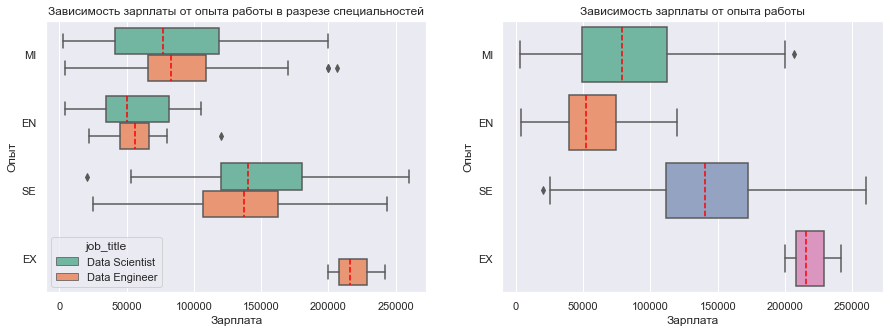

In [2767]:
# Посмотрим  на влияние опыта работы на зарплату?
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data, 
            x='salary_in_usd', 
            y='experience_level', 
            orient='h', 
            medianprops={"color": "red", "linestyle": '--'},
            hue='job_title', 
            ax=axes[0])
axes[0].set(xlabel='Зарплата', ylabel='Опыт')
axes[0].set_title('Зависимость зарплаты от опыта работы в разрезе специальностей')


sns.boxplot(data, 
            x='salary_in_usd', 
            y='experience_level', 
            orient='h', 
            medianprops={"color": "red", "linestyle": '--'},
            ax=axes[1])
axes[1].set(xlabel='Зарплата', ylabel='Опыт')
axes[1].set_title('Зависимость зарплаты от опыта работы')

In [2768]:
# Посмотрим на записи с опытом EX
display(data[data['experience_level']=='EX'])
# Сохраним маску для данных без опыта 
maskEX = (data['experience_level']!='EX') 

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
309,309,2022,EX,FT,Data Engineer,242000,USD,242000,US,100,US,M
310,310,2022,EX,FT,Data Engineer,200000,USD,200000,US,100,US,M
483,483,2022,EX,FT,Data Engineer,216000,USD,216000,US,100,US,M


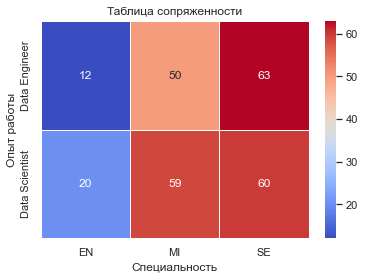

In [2789]:
cross_tab = pd.crosstab(index=data['job_title'], columns=data['experience_level'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Специальность', ylabel='Опыт работы')
plt.title('Таблица сопряженности')
plt.show()

Визуальный анализ подтверждает, что уровень опыта оказывает существенное влияние на зарплату.
В то же время для разных специальностей это влияние выглядит идентичным. 

Существует связь между специальностью и требуемым опытом работы. Для специальности Data Scientist востребованы уровни MI и SE в равной степени. Для специальности Data Engineer опыт EN тоже требуется минимально, но SE востребован в приоритете.

Данные с опытом работы EX (Executive-level/Director) представлены в выборке в нимимальном количестве и только для специальности Data Engineer. На этапе статистического анализа проверим их влияние на выводы.

На схеме так же видны выбросы:
* опыт MI с зарплатой выше 200 т., что гораздо выше среднего для SE
* опыт EN тоже в зарплатой выше чем у большего уровня MI
* опыт SE с низкой зарплатой 

Пока решила их оставить


---
__Для повторения материала__

In [2769]:
# Порядковое кодирование
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

# ord_encoder = ce.OrdinalEncoder()
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'company_size',
	'mapping': {'S': 1, 'M': 2, 'L': 3}
}])
#data=data.sort_values(by='company_size',ascending=False)
data_size = ord_encoder.fit_transform(data[['company_size']])
# Внимание - передаем список столбцов, поэтому двойные [[]] - DataFrame.
# метод принимает и Series
# возвращает DataFrame, для каждого переданного столбца одноименный результат и индекс
data_size.rename(columns={'company_size': 'company_nsize'}, inplace=True)
#display(data_size)
data = pd.concat([data, data_size], axis=1)

# concat - присоединит DataFrame
#data.head()

C:\Users\fga\AppData\Local\Temp\ipykernel_1160\962621440.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

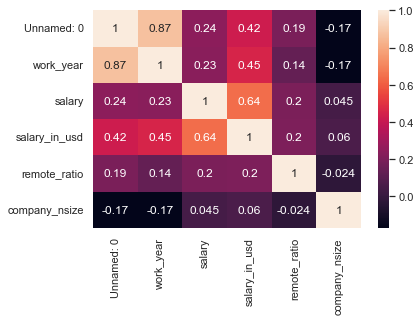

In [2770]:
sns.heatmap(data.corr(method='spearman'), annot = True)


In [2771]:
# дополнительных коррекляций нет


## Статистический анализ данных

Проверим, являются ли наши предварительные выводы статистически значимыми.

In [2772]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

---

### 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

В данных есть информация за три года. По моему нужно делить на две части и анализировать пару условий отдельно.

**2020 и 2021 год**

*Нулевая гипотеза* ($H_0$): размер зарплаты за 2020 год ($μ_1$) больше или такая же как заплата за 2021 год ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заплаты за 2021 год ($μ_2$) статистически больше, чем размер зарплаты за 2020 год ($μ_1$).

$$ H_1 : μ_1 < μ_2$$

**2021 и 2022 год**

*Нулевая гипотеза* ($H_0$): размер зарплаты за 2021 год ($μ_2$) не меньше заплаты за 2022 год ($μ_3$).

$$ H_0 : μ_2 >= μ_3$$

*Альтернативная гипотеза* ($H_1$): размер заплаты за 2022 год ($μ_3$) статистически больше, чем размер зарплаты за 2021 год ($μ_2$)..

$$ H_1 : μ_2 < μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [2773]:
# маски для фильтра данных
mask20 = (data['job_title']=='Data Scientist') & (data['work_year']==2020)
mask21 = (data['job_title']=='Data Scientist') & (data['work_year']==2021)
mask22 = (data['job_title']=='Data Scientist') & (data['work_year']==2022)
data_mask20 = data[mask20]
data_mask21 = data[mask21]
data_mask22 = data[mask22]
#display(data[mask20])

In [2774]:
# проводим тест Шапиро-Уилка
print('2020:')
result = stats.shapiro(data[mask20]['salary_in_usd'])
decision_normality(result[1])

print('2021:')
result = stats.shapiro(data[mask21]['salary_in_usd'])
decision_normality(result[1])

print('2022:')
result = stats.shapiro(data[mask22]['salary_in_usd'])
decision_normality(result[1])


2020:
p-value = 0.053
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
2021:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
2022:
p-value = 0.273
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Из любопытства посмотрю на визуализацию.

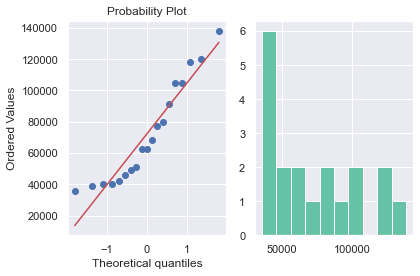

In [2775]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data[mask20]['salary_in_usd'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data[mask20]['salary_in_usd']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

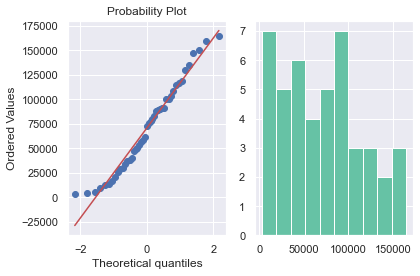

In [2776]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data[mask21]['salary_in_usd'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data[mask21]['salary_in_usd']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

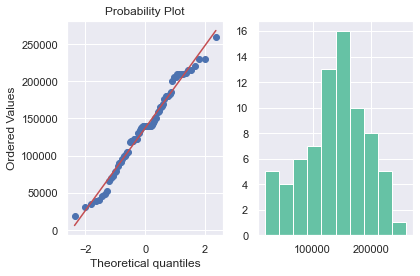

In [2777]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data[mask22]['salary_in_usd'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data[mask22]['salary_in_usd']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Вывод: по гистограмме сложно судить о нормальности распределения. Лучше всегда визуализировтаь qq (квантиль -квантиль) график.

Добавила в блоке визуализации этот график.

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах»? — Количественный.
* Сколько сравниваемых групп? — Две. (для каждой пары гипотез анализ проводим отдельно)
* Группы зависимы? — Нет. (ни в описании , ни на сайте источнике не упоминается что данные для одних и тех же вакансий, да и моло вероятно, что вакансии были активны несколько лет.)
* Признак распределён по нормальному закону? — Да.

Для проверки нашей гипотезы можно использовать Двухвыборочный t-критерий (t-test).

**Проведём тесты**


In [2778]:
# Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data[mask20]['salary_in_usd'], data[mask21]['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data[mask20]['salary_in_usd'], data[mask21]['salary_in_usd'], alternative='less', equal_var= (p > alpha))

decision_hypothesis(p)

Тест на равенство дисперсий
p-value = 0.057
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.553
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [2779]:
# Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data[mask21]['salary_in_usd'], data[mask22]['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data[mask21]['salary_in_usd'], data[mask22]['salary_in_usd'], alternative='less', equal_var= (p > alpha))

decision_hypothesis(p)


Тест на равенство дисперсий
p-value = 0.444
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Рост зарплаты в 2021 году относительно 2020 статистически не подтверждается.
Зарплаты в 2022 году выросли.

---

### 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

На основании данных визуального анализа проверим вывод, что зарплата Data Scientist выше.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): зарплата Data Scientist ($μ_1$) статистически меньше либо равна зарплате Data Engineer ($μ_2$) в 2022 году.

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата Data Scientist ($μ_1$) статистически больше зарплаты Data Engineer ($μ_2$) в 2022 году.

$$ H_1 : μ_1 > μ_2$$

In [2780]:
# маски для фильтра данных
maskDS22 = (data['job_title']=='Data Scientist') & (data['work_year']==2022)
maskDE22 = (data['job_title']=='Data Engineer') & (data['work_year']==2022) 
#display(data[maskDE22])

data_maskDS22 = data[maskDS22]
data_maskDE22 = data[maskDE22]

In [2781]:
# проводим тест Шапиро-Уилка
print('Data Scientist:')
result = stats.shapiro(data_maskDS22['salary_in_usd'])
decision_normality(result[1])

print('Data Engineer:')
result = stats.shapiro(data_maskDE22['salary_in_usd'])
decision_normality(result[1])


Data Scientist:
p-value = 0.273
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Data Engineer:
p-value = 0.049
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах»? — Количественный.
* Сколько сравниваемых групп? — Две. 
* Группы зависимы? — Нет. 
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можо использовать U-критерий Манна — Уитни.

**Проведём тесты**


In [2782]:
# проводим тест
_, p = stats.mannwhitneyu(data_maskDS22['salary_in_usd'], data_maskDE22['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

p-value = 0.057
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [2783]:
# Отличаются ли они вообще (нулевая гипотеза - не отличаются)
_, p = stats.mannwhitneyu(data_maskDS22['salary_in_usd'], data_maskDE22['salary_in_usd'], alternative='two-sided')
decision_hypothesis(p)

p-value = 0.114
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


На этапе визуального анализа мы выявили существенное отличие данных о зарплате по специальности Data Engineer. В выворке присуствуют три записи с высокой зарплатой и при этом для опыта EX, по которому ваканчии на специальность Data Scientist отсуствуют.
Они могут искажать картину.
Проведем анализ без них.

In [2785]:
data_maskDE22 = data_maskDE22[data_maskDE22['experience_level']!='EX']
#display(data.info())
#data.reset_index(drop= True , inplace= True )
#display(data.info())



In [2786]:
# проводим тест Шапиро-Уилка
print('Data Scientist:')
result = stats.shapiro(data_maskDS22['salary_in_usd'])
decision_normality(result[1])

print('Data Engineer:')
result = stats.shapiro(data_maskDE22['salary_in_usd'])
decision_normality(result[1])



Data Scientist:
p-value = 0.273
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Data Engineer:
p-value = 0.088
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Корретировка выборки сделала распределение данных нормальным.

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах»? — Количественный.
* Сколько сравниваемых групп? — Две. 
* Группы зависимы? — Нет. 
* Признак распределён по нормальному закону? — Да.

Для проверки нашей гипотезы можно использовать Двухвыборочный t-критерий (t-test).

**Проведём тесты**


In [2788]:
# Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_maskDS22['salary_in_usd'], data_maskDE22['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_maskDS22['salary_in_usd'], data_maskDE22['salary_in_usd'], alternative='greater', equal_var= (p > alpha))

decision_hypothesis(p)

Тест на равенство дисперсий
p-value = 0.765
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.031
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Данные выборки дают статистически значимое подтверждение превышение зарплаты Data Scientist над Data Engineer в 2022 году. Исключением являются ваканчии на опыт работы уровня EX.

---

### 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: зарплаты специалистов Data Scientist в компаниях различных размеров не отличаются: небольшие($μ_1$), средние ($μ_2$), крупные ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: зарплаты специалистов Data Scientist в компаниях различных размеров отличаются: небольшие($μ_1$), средние ($μ_2$), крупные ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

In [ ]:
# маски для фильтра данных
maskS = (data['job_title']=='Data Scientist') & (data['company_size']=='S')
maskM = (data['job_title']=='Data Scientist') & (data['company_size']=='M')
maskL = (data['job_title']=='Data Scientist') & (data['company_size']=='L')
#display(data[maskS])

In [ ]:
# проводим тест Шапиро-Уилка
print('Не большие:')
result = stats.shapiro(data[maskS]['salary_in_usd'])
decision_normality(result[1])

print('Средние:')
result = stats.shapiro(data[maskM]['salary_in_usd'])
decision_normality(result[1])

print('Крупные:')
result = stats.shapiro(data[maskL]['salary_in_usd'])
decision_normality(result[1])

Не большие:
p-value = 0.208
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Средние:
p-value = 0.597
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Крупные:
p-value = 0.042
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах»? — Количественный.
* Сколько сравниваемых групп? — Три. 
* Группы зависимы? — Нет. 
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можо использовать Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах).

**Проведём тесты**


In [ ]:
# проводим тест
_, p = stats.kruskal(data[maskS]['salary_in_usd'], data[maskM]['salary_in_usd'], data[maskL]['salary_in_usd'])
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Промежуточный вывод - зарплаты отличаются.
Но это не ответ на поставленный вопрос.
Сравним попарно рассматриваемые выборки.

На основании данных визуального анализа мы предполагаем, что зарплаты упорядочены следущим образам:  S,L,M.

Формулируем следующие гипотезы:
* S и M
$$ H_0 : μ_1 >= μ2$$
$$ H_1 : μ_1 < μ_2$$
* M и L
$$ H_0 : μ_2 <= μ_3$$
$$ H_1 : μ_2 > μ_3$$
* L и S
$$ H_0 : μ_3 <= μ_1$$
$$ H_1 : μ_3 > μ_1$$


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах»? — Количественный.
* Сколько сравниваемых групп? — Две. 
* Группы зависимы? — Нет. 
* Признак распределён по нормальному закону? — Да для пары S и M. Нет в парах для L

Для проверки нашей гипотезы можно использовать:
* для пары S и M  - Двухвыборочный t-критерий (t-test) 
* для пар с L - U-критерий Манна — Уитни.

**Проведём тесты**


In [ ]:
# Сравним зарплаты в компаниях S и M 
# Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data[maskS]['salary_in_usd'], data[maskM]['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест 
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data[maskS]['salary_in_usd'], data[maskM]['salary_in_usd'], alternative='less', equal_var= (p > alpha))

decision_hypothesis(p)


Тест на равенство дисперсий
p-value = 0.027
Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [ ]:
# Отличаются ли зарплаты в компаниях S и M 
_, p = stats.mannwhitneyu(data[maskS]['salary_in_usd'], data[maskM]['salary_in_usd'], alternative='two-sided')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [ ]:
# Сравним зарплаты в компаниях M и L 
_, p = stats.mannwhitneyu(data[maskM]['salary_in_usd'], data[maskL]['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [ ]:
# Сравним зарплаты в компаниях L и S 
_, p = stats.mannwhitneyu(data[maskL]['salary_in_usd'], data[maskS]['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Зарплата для специальности зависит от размера компании. Максимальный размер в средних компаниях, минимальный в небольших.

---

4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между требуемой специальностью и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между требуемой специальностью и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [ ]:
# составляем таблицу сопряжённости

cross_table = pd.crosstab(data['job_title'], data['company_size'])

cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,85,6
Data Scientist,44,75,20


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Связь между наличием вакансии на должностей Data Scientist и Data Engineer и размером компании есть.

---

4. Есть ли связь между требуемым опытом и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между требуемым опытом и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между требуемым опытом и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [2791]:
# составляем таблицу сопряжённости

cross_table = pd.crosstab(data['experience_level'], data['company_size'])

cross_table

company_size,L,M,S
experience_level,,,
EN,10,14,8
MI,41,55,13
SE,27,91,5


In [2792]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Связь между требуемым опытом и размером компании есть.

---

___Пример статистического анализа по одной выборке:___

По данным росстата средняя зарплата в России в мае этого года 72851 р., что за год по курсу 94.1 составляет 9290 usd.

Проверим, что в 2022 году минимальный опыт на должности Data Scientist или Data Engineer оплачивается лучше.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): зарплата Data Scientist или Data Engineer ($μ_1$) статистически меньше либо равна 9290 usd в 2022 году.

$$ H_0 : μ_1 <= 9290 $$

*Альтернативная гипотеза* ($H_1$): зарплата Data Scientist или Data Engineer ($μ_1$) статистически больше 9290 usd в 2022 году.

$$ H_1 : μ_1 > 9290 $$

In [2797]:
data_EN22  = data[(data['experience_level']=='EN') & (data['work_year']==2022)]


In [2798]:
# проводим тест Шапиро-Уилка
print('Анализ распоределения:')
result = stats.shapiro(data_EN22['salary_in_usd'])
decision_normality(result[1])


Анализ распоределения:
p-value = 0.444
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах»? — Количественный.
* Сколько сравниваемых групп? — одна. 
* Признак распределён по нормальному закону? — Да

Для проверки нашей гипотезы можно использовать Одновыборочный t-критерий (t-test).

**Проведём тесты**


In [2800]:
# проводим тест
_, p = stats.ttest_1samp(data_EN22['salary_in_usd'], popmean=9290, alternative='greater')
decision_hypothesis(p)


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


## Итоговые результаты исследования

*   В 2022 году по отношению к предыдущим наблюдается статистически значемый рост зарплат у специалистов Data Scientist. В отношении предыдущего периода такой вывод сделать нельзя.
*   Данные выборки дают статистически значимое подтверждение превышение зарплаты Data Scientist над Data Engineer в 2022 году. 
Исключением являются ваканчии на опыт работы уровня EX.
*   Зарплаты специалистов Data Scientist максимальны в средних компаниях, минимальны в небольших.
*   Есть связь между наличием должностей Data Scientist и Data Engineer и размером компании. 
По данным визуального анализа мы можем сделать вывод, что должностей Data Engineer в средних компаниях больше, чем на Data Scientist. В небольших и крупных компаниях ситуация обратная.
*   Есть связь между требуемым опытом для должности Data Scientist или Data Engineer и размером компании. В средних компаниях наиболее востребованы опытные специалисты. 
А в крупных и небольших компаниях больше работают специалисты среднего уровня (MI — Mid-level/Intermediate)
*   Средняя зарплата за 2022 год по специальностям Data Scientist и Data Engineer в выборке даже для минимального опыта больше чем средняя зарплата по России на май 2023 года.